# Preditive Analysis and Customer Segmentation for an E-commerce platform


In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading dataset 
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print('Shape of Data:', data.shape)
print('Datatypes of Data:', data.dtypes)

Shape of Data: (541909, 8)
Datatypes of Data: InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


Data Cleaning and Preprocessing

In [4]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# dropping customer ID column
data = data.dropna()

## Data inconsistencies and Data Type mismatch

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.query('Quantity <0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [10]:
data.query('UnitPrice<=0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [11]:
neg_index = data[(data['Quantity']<0) | (data['UnitPrice']<=0)].index
data = data.drop(neg_index)

In [12]:
data.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [14]:
#Calulating total bill amount
data['Total_Amount'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format ='%m/%d/%Y %H:%M')
data.insert(loc=3, column="Year", value = data.InvoiceDate.dt.year)

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploratory Data Analysis

In [17]:
data.corr(numeric_only = True)

,Year,Quantity,UnitPrice,CustomerID,Total_Amount
Year,1.000000,0.001553,-0.000192,-0.036351,0.000431
Quantity,0.001553,1.000000,-0.004563,-0.006232,0.914387
UnitPrice,-0.000192,-0.004563,1.000000,-0.010873,0.081645
CustomerID,-0.036351,-0.006232,-0.010873,1.000000,-0.004109
Total_Amount,0.000431,0.914387,0.081645,-0.004109,1.000000


<Axes: >

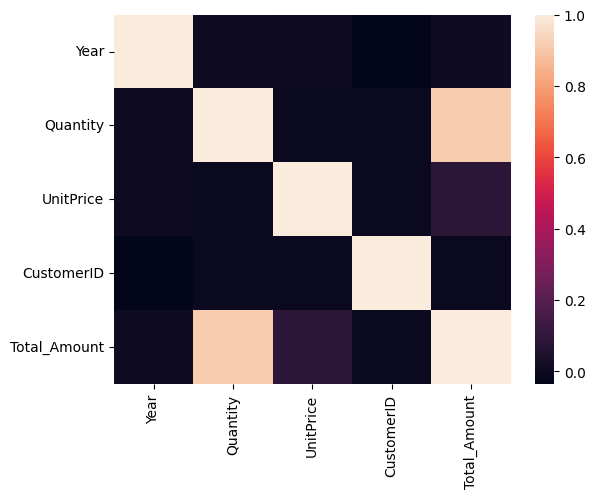

In [18]:
sns.heatmap(data.corr(numeric_only = True))

In [19]:
#top 10 countries with highest sales
top_10_country_sales = data.groupby('Country')['Total_Amount'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_country_sales

,Country,Total_Amount
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


<Figure size 600x300 with 0 Axes>

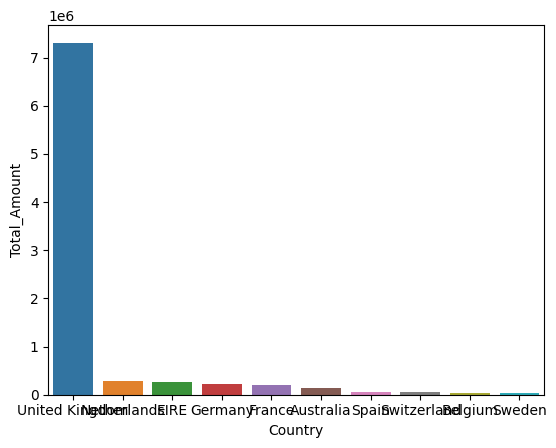

<Figure size 600x300 with 0 Axes>

In [20]:
sns.barplot(data = top_10_country_sales, x='Country', y='Total_Amount')
plt.figure(figsize=(6,3))


In [21]:
data['DayCode'] = data['InvoiceDate'].dt.dayofweek
data['Day'] = data['InvoiceDate'].dt.day_name()

In [22]:
# most favorable day of shopping
data_by_day = data.groupby(["Day", "DayCode"]).agg({"Total_Amount": "sum", "InvoiceNo":"count"}) \
            .reset_index() \
            .sort_values(by="DayCode") \
            .rename(columns = {"Total_Amount":"ValueTransaction", "InvoiceNo":"NumberOfOrders"})
data_by_day

,Day,DayCode,ValueTransaction,NumberOfOrders
1,Monday,0,1367146.411,64893
4,Tuesday,1,1700634.631,66473
5,Wednesday,2,1588336.170,68885
3,Thursday,3,1976859.070,80035
0,Friday,4,1485917.401,54825
2,Sunday,6,792514.221,62773


<Axes: xlabel='Day', ylabel='ValueTransaction'>

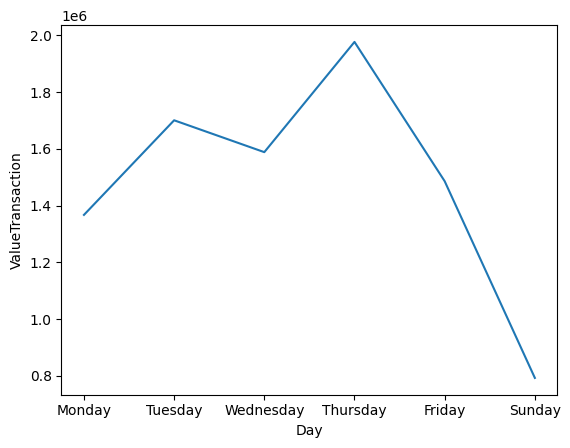

In [23]:
sns.lineplot(data = data_by_day, x='Day', y='ValueTransaction')

In [24]:
orders_count = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders_count.head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


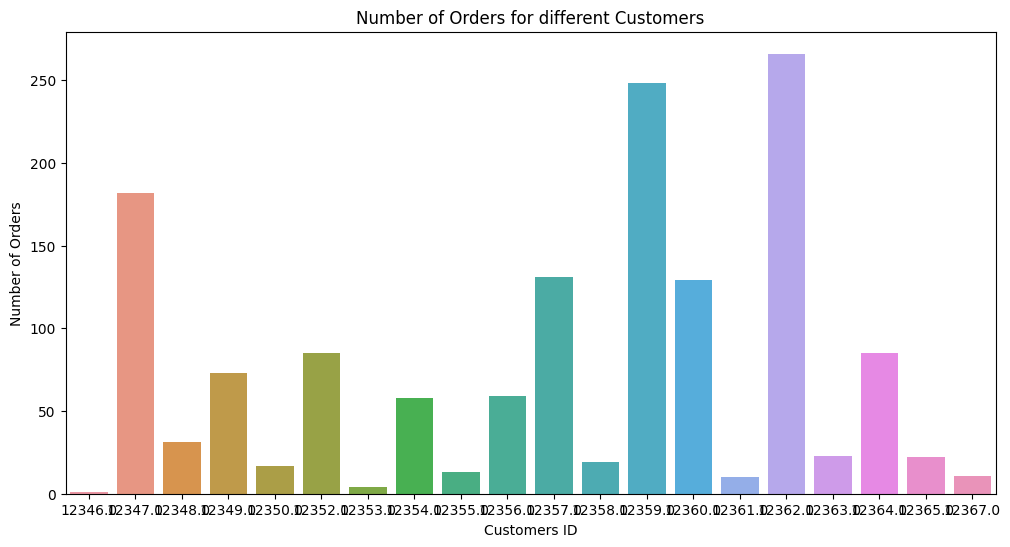

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=orders_count['CustomerID'].head(20),y=orders_count['InvoiceNo'].head(20))
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Text(0.5, 0, 'Quantity')

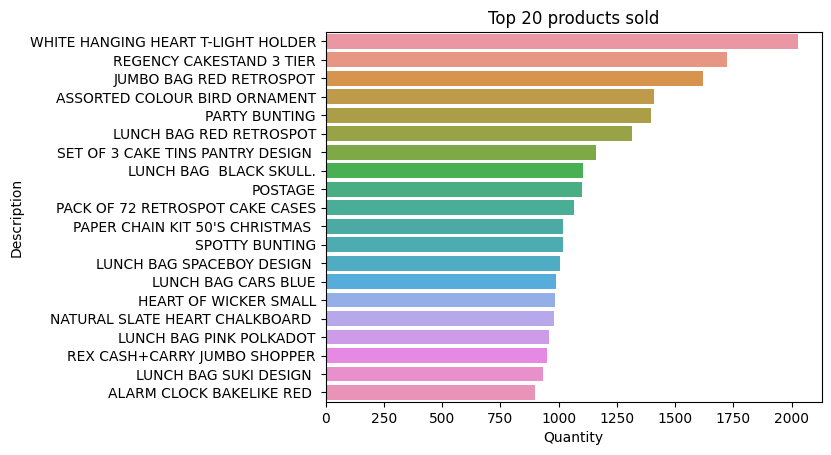

In [26]:
sns.barplot(x = data.Description.value_counts().head(20), y = data.Description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("Quantity")

## Feature Engineering and Data Transformation

In [27]:
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour


In [28]:
data.head()

,InvoiceNo,StockCode,Description,Year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,DayCode,Day,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,1,12,8
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,1,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8


In [29]:
data.describe()

,Year,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Amount,DayCode,Day,Month,Hour
count,397884.000000,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,2010.934260,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,2.614546,15.042186,7.612475,12.728202
min,2010.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,0.000000,1.000000,1.000000,6.000000
25%,2011.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,1.000000,7.000000,5.000000,11.000000
50%,2011.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,2.000000,15.000000,8.000000,13.000000
75%,2011.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,4.000000,22.000000,11.000000,14.000000
max,2011.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,6.000000,31.000000,12.000000,20.000000
std,0.247828,179.331775,NaN,22.097877,1713.141560,309.071041,1.928310,8.653746,3.416520,2.273519


In [30]:
#Data Transformation
#Log transformation of Total_Amount spending to handle skewed distribution
data['Log_Annual_Spending'] = np.log1p(data['Total_Amount'])

(array([4.85680e+04, 1.30598e+05, 1.80998e+05, 2.87840e+04, 7.71100e+03,
        1.02800e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([9.99500333e-04, 1.20435120e+00, 2.40770291e+00, 3.61105461e+00,
        4.81440631e+00, 6.01775802e+00, 7.22110972e+00, 8.42446142e+00,
        9.62781313e+00, 1.08311648e+01, 1.20345165e+01]),
 <BarContainer object of 10 artists>)

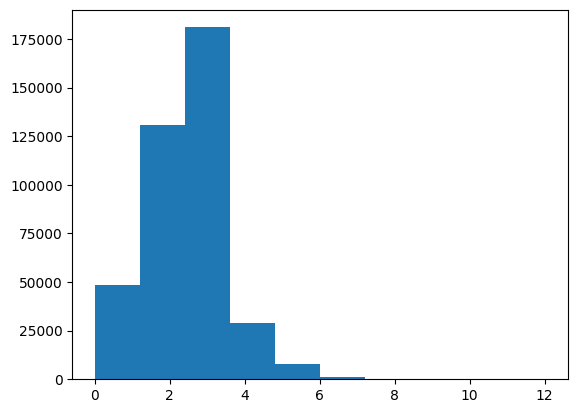

In [31]:
plt.hist(data['Log_Annual_Spending'])

In [32]:
#Grouping of the data by annual spending of the each customer
annual_spending = data.groupby('CustomerID')['Total_Amount'].sum()
annual_spending

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_Amount, Length: 4338, dtype: float64

In [33]:
data = data.merge(annual_spending, on='CustomerID', suffixes=('', '_AnnualSpending'))
data.head()

,InvoiceNo,StockCode,Description,Year,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,DayCode,Day,Month,Hour,Log_Annual_Spending,Total_Amount_AnnualSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,1,12,8,2.791165,5391.21
1,536365,71053,WHITE METAL LANTERN,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8,3.060583,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,1,12,8,3.135494,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8,3.060583,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,1,12,8,3.060583,5391.21


In [34]:
# Encode categorical variables (Country) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Country_Encoded'] = le.fit_transform(data['Country'])

## Predictive Model Building

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [36]:
x = data[['Quantity', 'UnitPrice', 'Country_Encoded', 'Year']]
y = data['Total_Amount']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(318307, 4)
(79577, 4)
(318307,)
(79577,)


# Linear Regression Model 

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

# Decision Tree Regression Model

In [39]:
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_train_predict_dtr = dtr.predict(x_train)
y_test_predict_dtr = dtr.predict(x_test)

# Random Forest Regression Model

In [40]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

# Model Evaluation 

# For Linear Regression

In [41]:
print("Linear Regression Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_lr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_lr))

Linear Regression Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 12.346463506387016
Mean Squared Error         : 17964.22554880099
Root Mean Squared Error    : 134.03068883207678
R2 Score                   : 0.8477397118442623

-----------------Testing Performance:-----------------
Mean Absolute Error        : 12.202289398529638
Mean Squared Error         : 2908.7105178904612
Root Mean Squared Error    : 53.93246256097028
R2 Score                   : 0.48868907930603167


# For Decision Tree Regressor

In [42]:
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 2.4873519396748364e-13
Mean Squared Error         : 2.9765084220913445e-25
Root Mean Squared Error    : 5.455738650349139e-13
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.7549921459720724
Mean Squared Error         : 18707.50923209344
Root Mean Squared Error    : 136.77539702773097
R2 Score                   : -2.288520363411712


# For Random Forest Regressor

In [43]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.26337448727182955
Mean Squared Error         : 3885.4021204643495
Root Mean Squared Error    : 62.33299383524226
R2 Score                   : 0.9670683022290208

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.3253346993479079
Mean Squared Error         : 2104.8366517932755
Root Mean Squared Error    : 45.87849879620382
R2 Score                   : 0.6299989429269982


In [44]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_train,y_train_predict_lr)*100,metrics.r2_score(y_train,y_train_predict_dtr)*100, metrics.r2_score(y_train,y_train_predict_rfr)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Linear Regressor,84.773971
1,Decision Tree Regressor,100.000000
2,Random Forest Regressor,96.706830


In [45]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_test,y_test_predict_lr)*100, metrics.r2_score(y_test,y_test_predict_dtr)*100, metrics.r2_score(y_test,y_test_predict_rfr)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Linear Regressor,48.868908
1,Decision Tree Regressor,-228.852036
2,Random Forest Regressor,62.999894


## Customer segmentation using clustering

In [46]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [47]:
new_column_name = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
data.rename(columns=new_column_name, inplace=True)

In [48]:
# Get the most recent date from the 'InvoiceDate' column
most_recent_date = data['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount': 'MonetaryValue'
}, inplace=True)

In [49]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


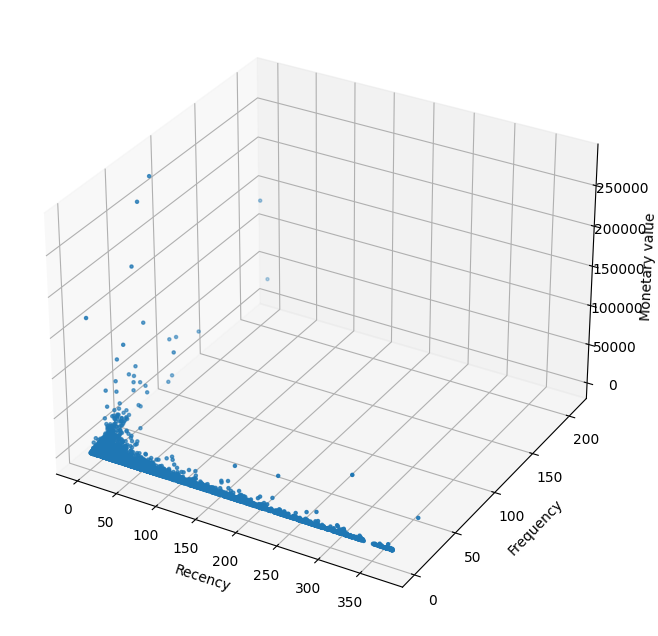

In [50]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [51]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [52]:

# Apply K-Means clustering to create clusters based on RFM metrics

kmeans = KMeans(n_clusters=4, random_state= 42)  
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [53]:
print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
KMeans_Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64


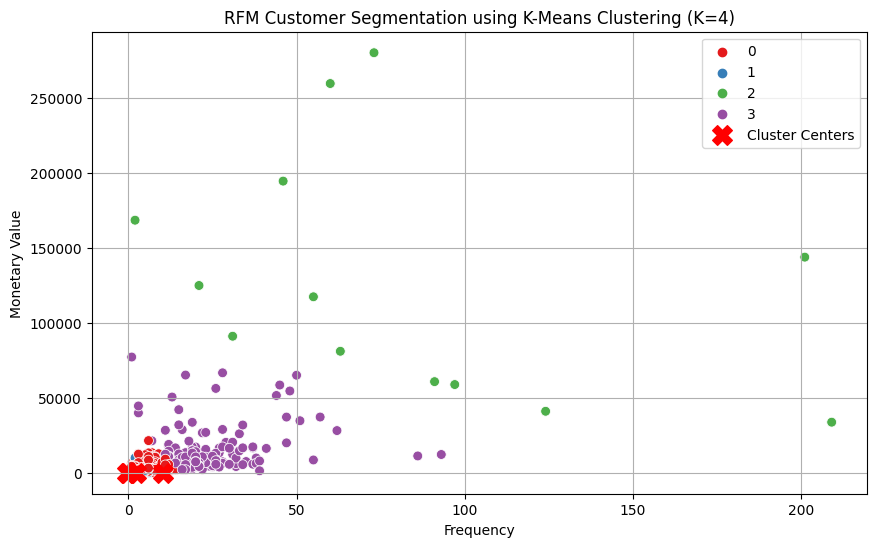

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='KMeans_Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (K=4)')
plt.legend()
plt.grid(True)
plt.show()

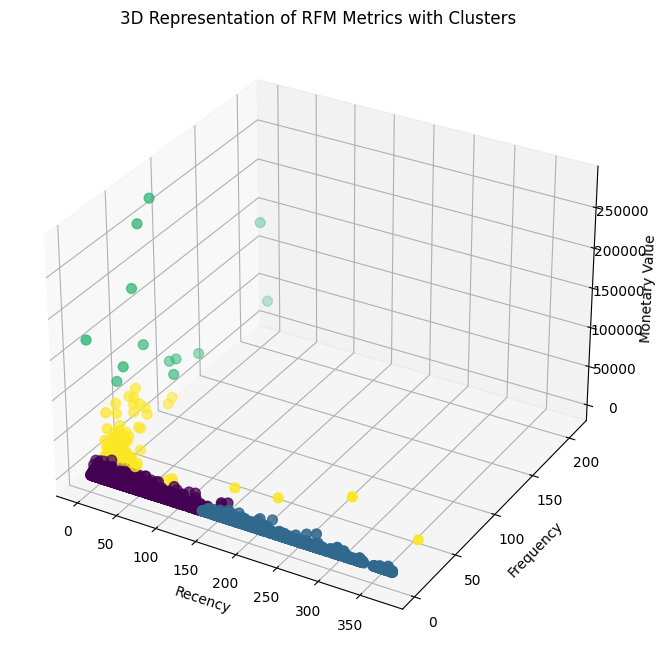

In [55]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [56]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [57]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
Agg_Cluster
2    3325
3     949
0      56
1       8
Name: count, dtype: int64


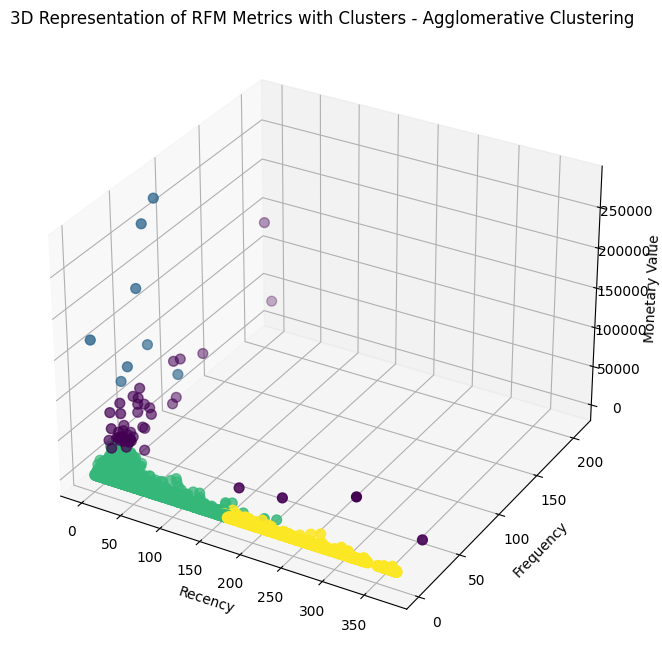

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()

# Interpretations
## High-Recency, Low-Frequency, Low-Monetary

Customers in this segment do not frequently make purchases, as seen by their high Recency value.

They also have low Frequency, which means that they don't buy things too often.

Additionally, their MonetaryValue is low, indicating that they consume less than other categories.

These individuals can be potential churned or inactive consumers in need of re-engagement tactics.

## Low-Recency, Low-Frequency, Low-Monetary

This segment's customers have low Recency, which means they have recently made purchases.
They do, however, have low Frequency and low Monetary Value, indicating that they spend little money and make few purchases.
This group may be made up of clients who have recently made purchases but have not shown a high level of involvement or loyalty. For them to spend more money and make purchases more frequently, they might need specific incentives or offers.
## High-Recency, High-Frequency, High-Monetary

This segment's customers have high Recency, which indicates that their purchases were not recent.
But , they have high Frequency, which indicates that they shop frequently.
Furthermore, their MonetaryValue is high, showing that they spend a lot more than other groups do.
This group is an accurate representation of the best clients, who are also the most lucrative for the company. Through individualised offers and loyalty programmes, they should be rewarded and kept around.
## Low-Recency, High-Frequency, High-Monetary

This segment's customers have low Recency, which means they have recently made purchases.
They often make purchases as evidenced by their high frequency.
Additionally, their MonetaryValue is high, indicating they have large expenditures.
This group is made up of devoted clients who are active buyers and a major source of income for the company. They will -probably respond favourably to loyalty incentives and tailored recommendations.